# Linear Regression Assignment on 'Bike sharing'

## Problem Statement :
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.
Due to the ongoing Corona pandemic, the company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

## Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 









## Step 1: Read and Understand the data

In [1056]:
# Import warnings

import warnings
warnings.filterwarnings("ignore")

In [1057]:
# Importing necessary libraries

import numpy as np
import pandas as pd

In [1058]:
# Read and display the data

df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1059]:
# Routine check commands

df.shape

(730, 16)

In [1060]:
# Checking all the columns from the dataset

df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [1061]:

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [1062]:
# Checking the data types of all columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 88.5+ KB


In [1063]:
# Check the datatypes 

df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

## Step 2. Exploratory Data Analysis

In [1064]:
# Rename few columns-

df.rename(columns= {'yr' : 'year', 'mnth':'month', 'hum':'humidity','cnt':'count','weathersit':'weather'},inplace =True)
df.head(5)

,instant,dteday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1065]:
# Converting the data types for our analysis-

df['season'] = df.season.astype('category')
df['holiday'] = df.holiday.astype('category')
df['weekday'] = df.weekday.astype('category')
df['weather'] = df.weather.astype('category')
df['month'] = df.month.astype('category')
df['workingday'] = df.workingday.astype('category')

In [1066]:
# Checking the new data types-

print(df.dtypes)

instant          int64
dteday          object
season        category
year             int64
month         category
holiday       category
weekday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity       float64
windspeed      float64
casual           int64
registered       int64
count            int64
dtype: object


### Detecting missing values

In [1067]:
df.isnull().sum()

instant       0
dteday        0
season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

Understanding: There are no missing values. Hence, no need to remove any particular row or column

In [1068]:
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Visualising the data

In [1069]:
# Importing necessary libraries

import matplotlib.pyplot as plt
import seaborn as sns

In [1070]:
df.head(2)

,instant,dteday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


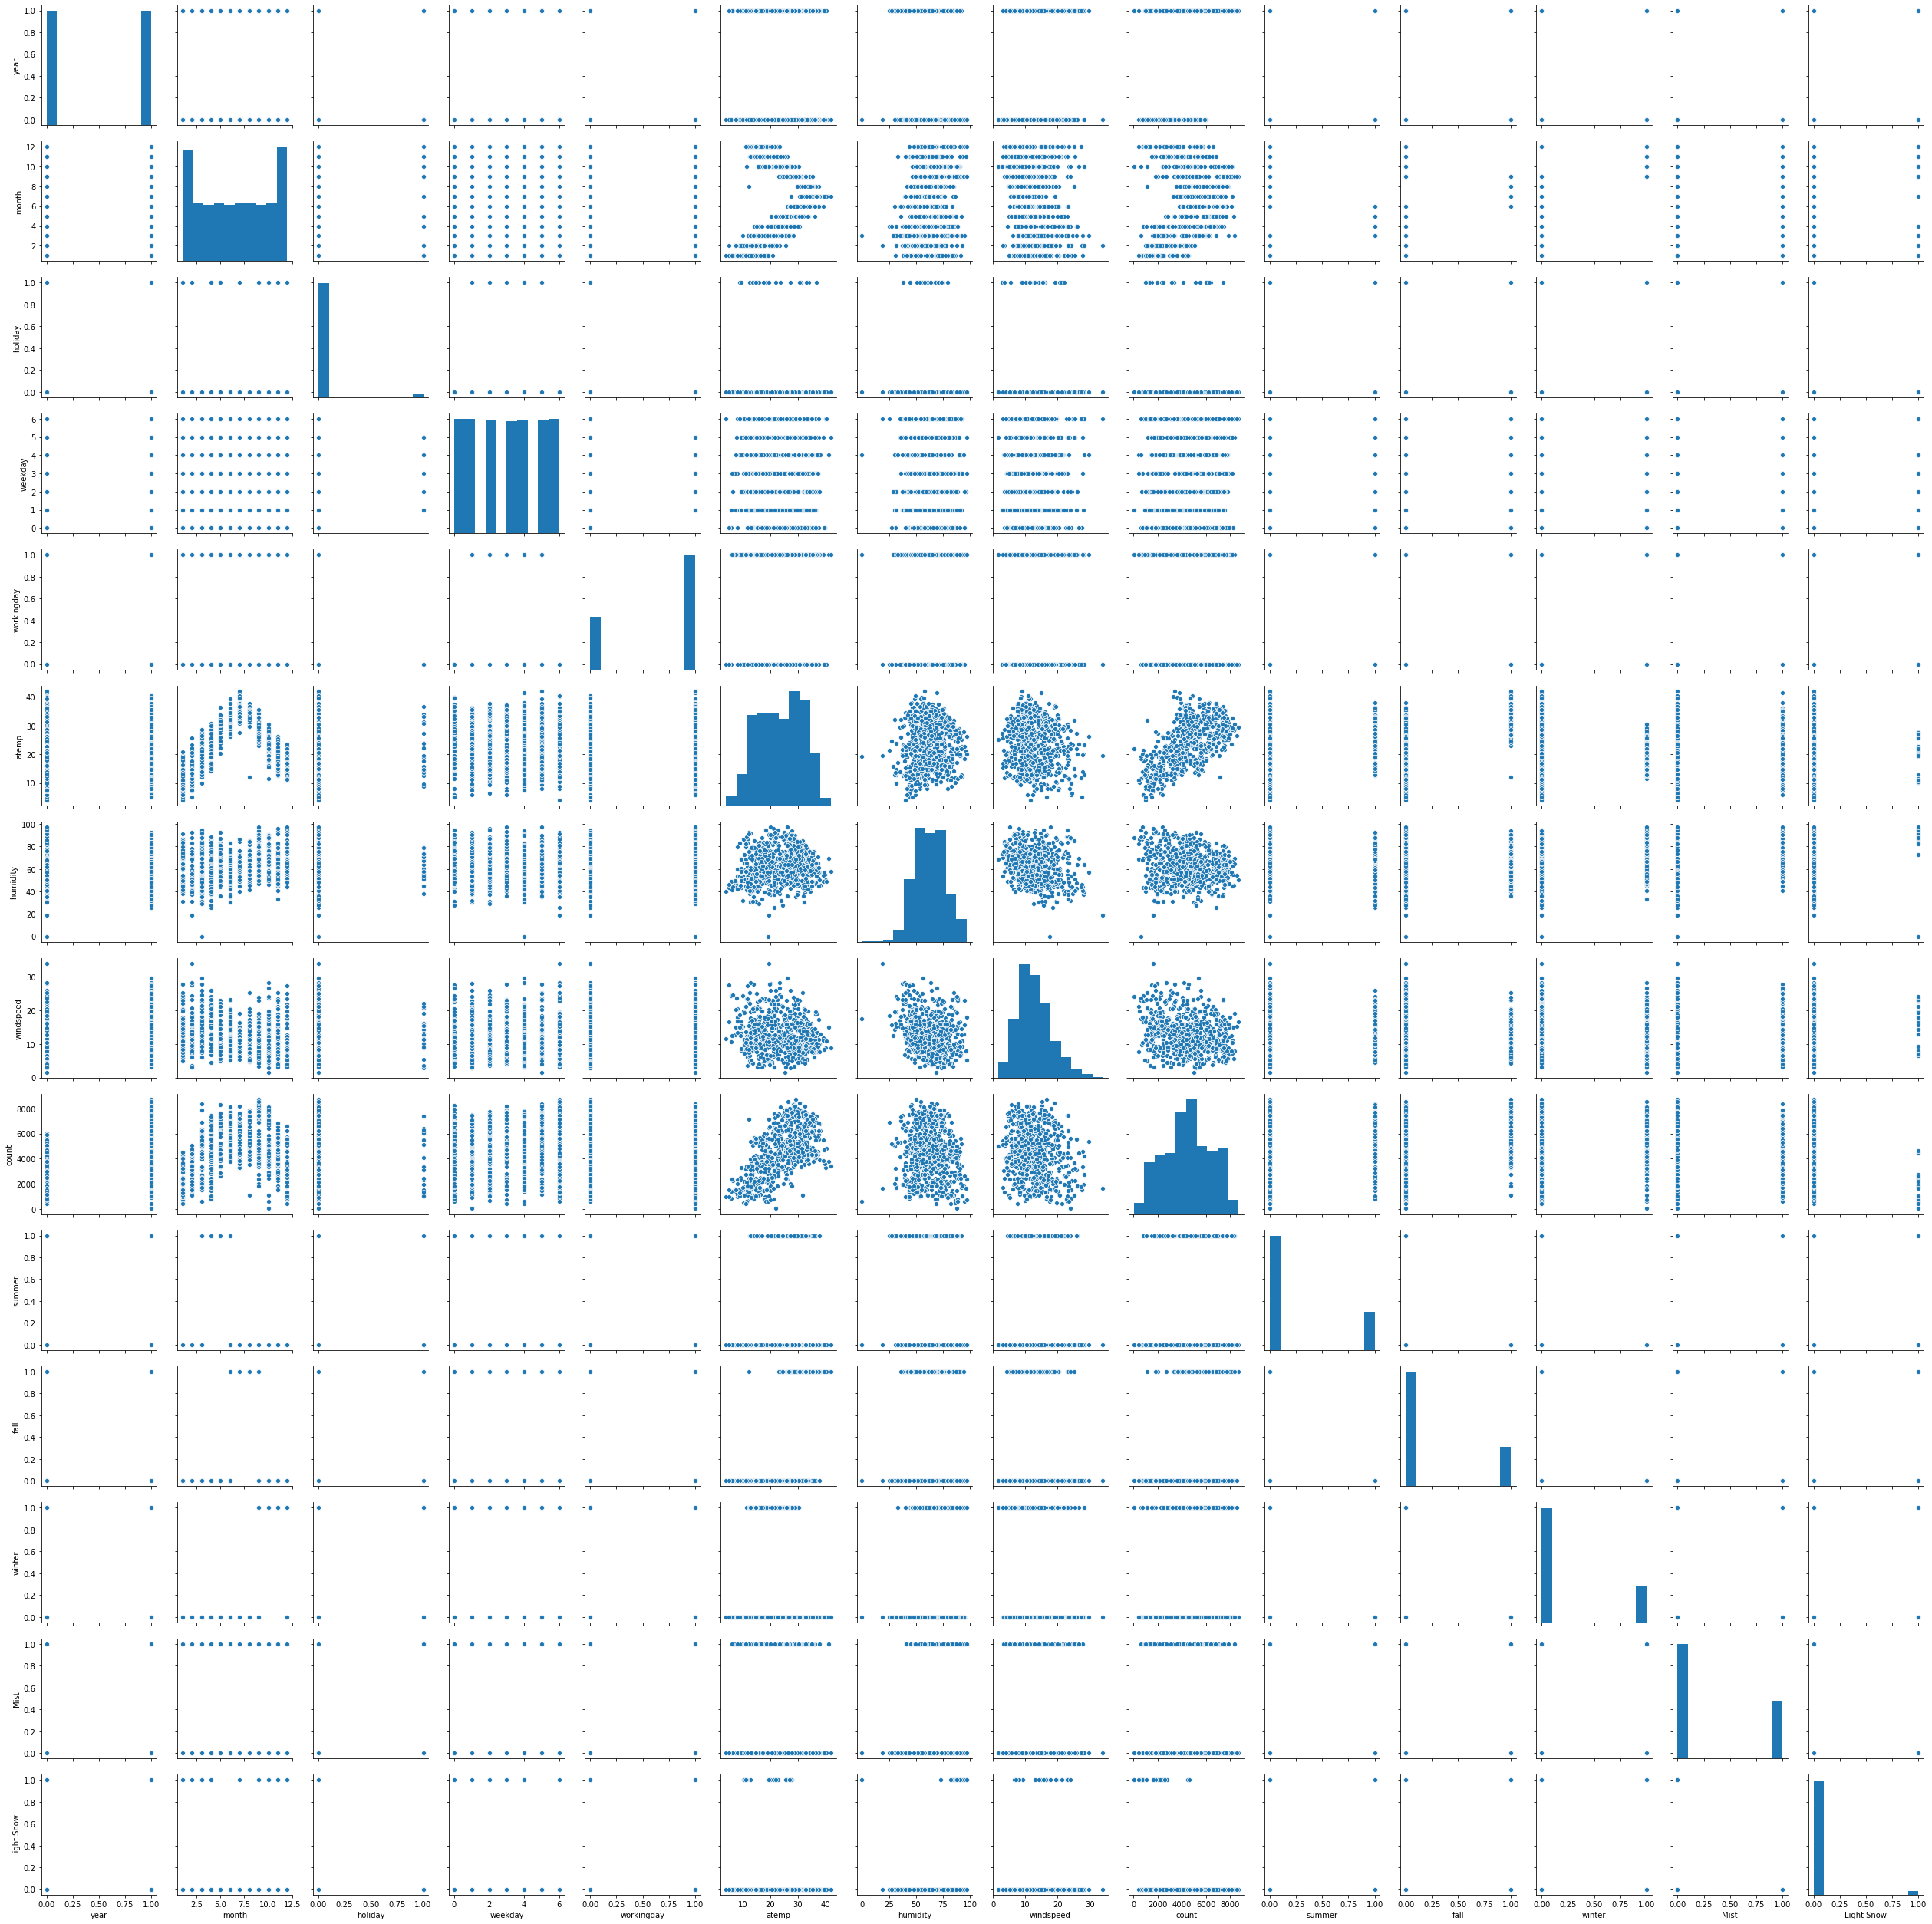

In [1055]:
# Checking the correlation b/w all variables 

sns.pairplot(df)
plt.show()

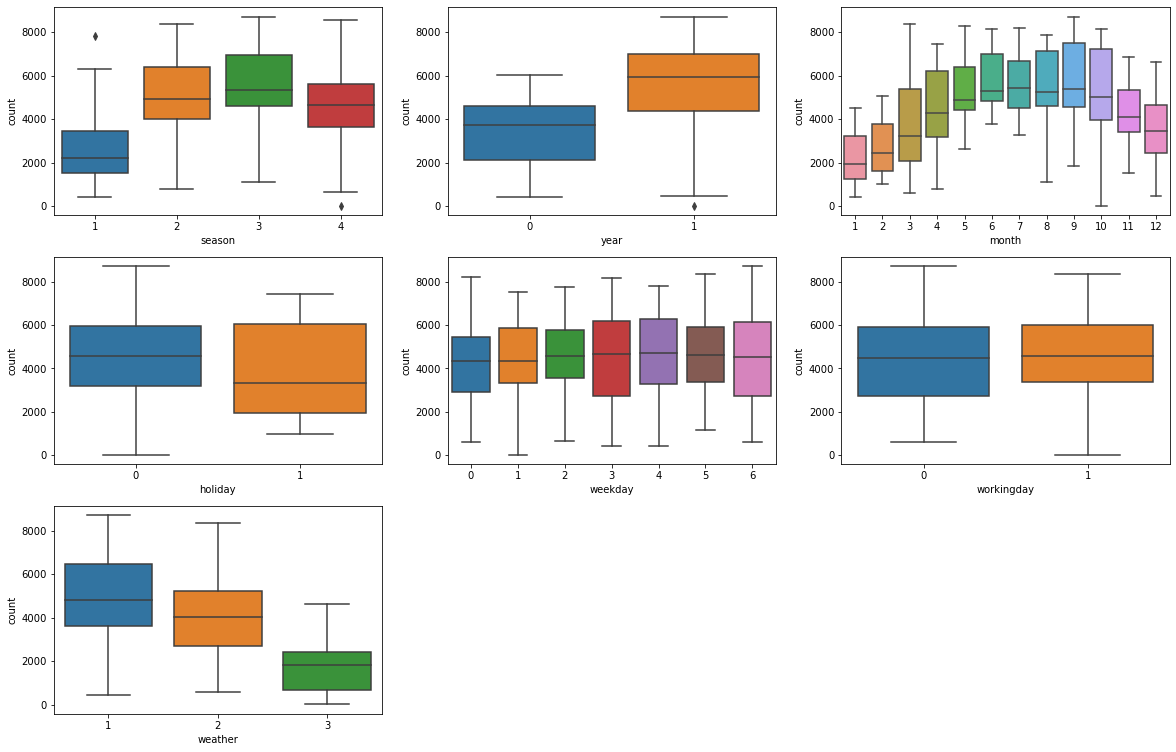

In [977]:
plt.figure(figsize = (20,13))

plt.subplot(331)
sns.boxplot(y = 'count', x = 'season',data = df)

plt.subplot(332)
sns.boxplot(y = 'count', x = 'year',data = df)

plt.subplot(333)
sns.boxplot(y = 'count', x = 'month',data = df)

plt.subplot(334)
sns.boxplot(y = 'count', x = 'holiday',data = df)

plt.subplot(335)
sns.boxplot(y = 'count', x = 'weekday',data = df)

plt.subplot(336)
sns.boxplot(y = 'count', x = 'workingday',data = df)

plt.subplot(337)
sns.boxplot(y = 'count', x = 'weather',data = df)


plt.show()

### Outlier detection

In [1071]:
df_without = df[np.abs(df['count']-df['count'].mean())<=(3*df['count'].std())] 

print ("Shape Of The Before Ouliers: ",df.shape)
print ("Shape Of The After Ouliers: ",df_without.shape)

Shape Of The Before Ouliers:  (730, 16)
Shape Of The After Ouliers:  (730, 16)


There aren't any outliers that could be removed

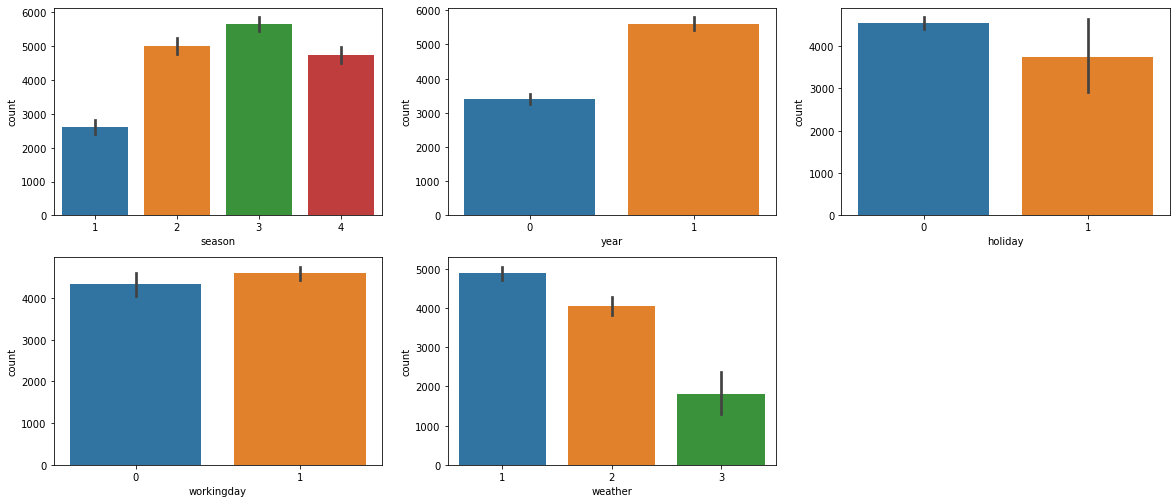

In [978]:
plt.figure(figsize = (20,13))

plt.subplot(331)
sns.barplot(x = 'season', y ='count',data =df)

plt.subplot(332)
sns.barplot(x = 'year', y ='count', data = df)

plt.subplot(333)
sns.barplot(x = 'holiday', y ='count', data = df)

plt.subplot(334)
sns.barplot(x = 'workingday', y ='count', data = df)

plt.subplot(335)
sns.barplot(x = 'weather', y ='count', data = df)

# plt.subplot(336)
# sns.barplot(x = 'instant', y ='count', data = df)

plt.show()



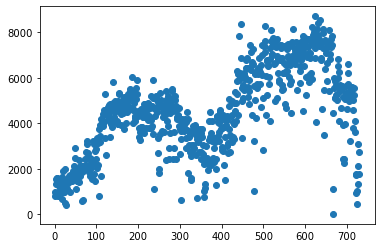

In [979]:
#Scatter plot to chck relation b/w instant and count

plt.scatter(x = 'instant', y ='count', data =df)
plt.show()

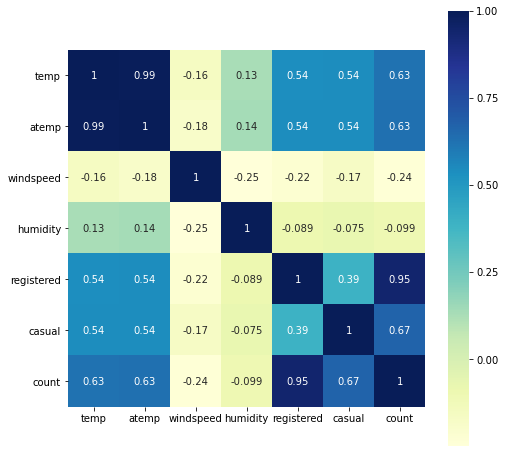

In [980]:
# Checking for correlations between count and numerical features

df_corr = df[['temp','atemp','windspeed','humidity','registered','casual','count']].corr()
mask = np.array(df_corr)

plt.figure(figsize = (8, 8))
sns.heatmap(df_corr ,square=True,annot=True,cmap="YlGnBu")
plt.show()

#### Understanding- 
- Target variable 'Count' is highly related to variable- 'temp' and 'atemp'. 
- It can be seen that variables- 'atemp' and 'temp' dont have much difference between and             are very strongly related. They might even be same at some point. One of them(preferably 'temp') can be dropped from our Model building steps.
- Variables- 'registered' and 'casual' dont make much sense as seen from the above plots that they both have very similar values. It is safe to remove these two columns from the Model.
- As seen from plots, Variable 'Instant' makes no sense at all and doesnt provide any valuable insights. It is safe to drop this variable at EDA.


### Univariate Analysis-
#### 1. season: 
1:spring, 2:summer, 3:fall, 4:winter

In [981]:
df['season'].describe()

count     730
unique      4
top         3
freq      188
Name: season, dtype: int64

In [982]:
df.season.dtype

CategoricalDtype(categories=[1, 2, 3, 4], ordered=False)

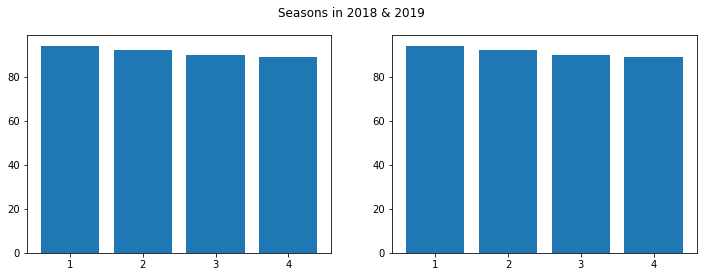

In [983]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

names = ['1', '2', '3', '4']

values = df['season'][df['year'] == 0].value_counts()
ax[0].bar(names, values)

values = df['season'][df['year'] == 1].value_counts()
ax[1].bar(names, values)

fig.suptitle('Seasons in 2018 & 2019')
plt.show()

###### Understanding- No difference between 2018 vs 2019. They both have very similar vales

#### 2. holiday

In [984]:
df['holiday'].describe()

count     730
unique      2
top         0
freq      709
Name: holiday, dtype: int64

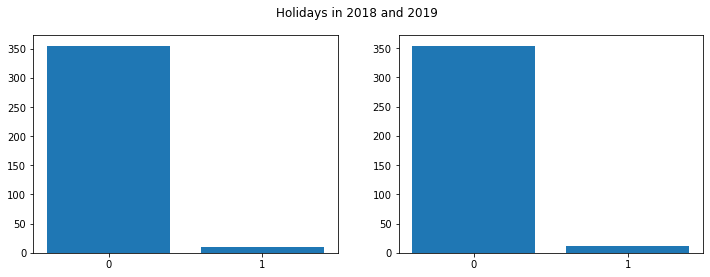

In [985]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

names = ['0', '1']

values = df['holiday'][df['year'] == 0].value_counts()
ax[0].bar(names, values)

values = df['holiday'][df['year'] == 1].value_counts()
ax[1].bar(names, values)

fig.suptitle('Holidays in 2018 and 2019');

###### Understanding-2018 and 2019 both have similar distribution of Holidays & No Holidays, there's hardly any difference.

### Multivariate Analysis

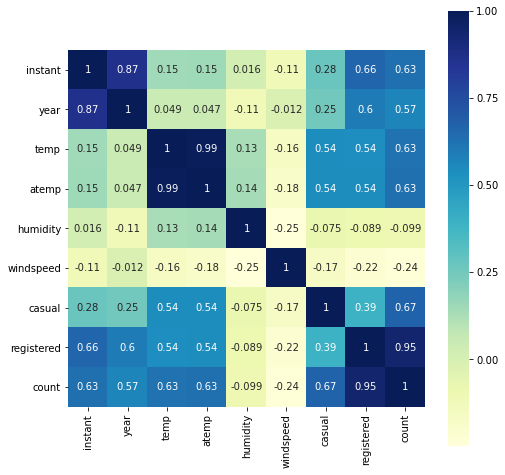

In [986]:
plt.figure(figsize = (8, 8))
sns.heatmap(data=df.corr(),  square=True, annot=True, cbar=True,cmap="YlGnBu")
plt.show()

###### 1. Atemp vs Count

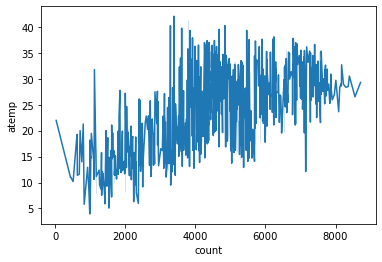

In [987]:
sns.lineplot(x = 'count',y = 'atemp',data = df)
plt.show()

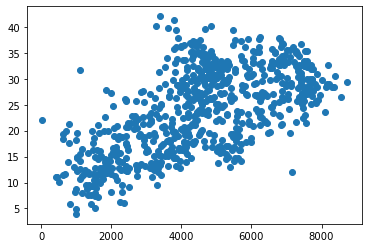

In [988]:
plt.scatter(y='atemp',x='count',data=df)
plt.show()

Understanding-
As seen from above graphs, that with increse in temperature, increase in number of ride occurs.

###### 2. Holiday  vs count

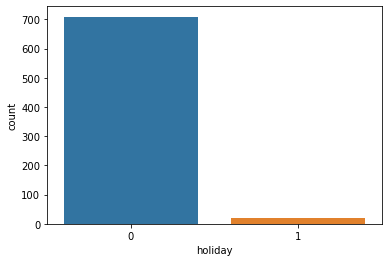

In [989]:
sns.countplot(x="holiday", data=df)
plt.show()

Understanding-
It can be clearly seen from above plot that most rides were on Non- holidays (0). Riders rented the Bikes to goto workplace.

### Removing vars- 'casual' and 'registered'

In [990]:
drop_list = ['casual', 'registered','dteday','instant']
df = df.drop(drop_list, axis=1)

## Step 3: Data preparation
### Creating dummy variables for
- season
- weather

In [991]:
#1. season

# 1:spring, 2:summer, 3:fall, 4:winter

df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [992]:
#Changing the values of season to meaningful values

# 1:spring, 2:summer, 3:fall, 4:winter

def func_season(x):
    if (x==1):
        return 'spring'
    elif (x==2):
        return 'summer'
    elif (x==3):
        return 'fall'
    elif(x==4):
        return 'winter'
    
df['season'] = df['season'].apply(lambda x : func_season(x))

In [993]:
# Creating dummy variable for season and storing it in a new variable 'season_new'

season_new  = pd.get_dummies(df['season'])

In [994]:
#Checking the values in the new column-

season_new.tail()

,spring,summer,fall,winter
725,1,0,0,0
726,1,0,0,0
727,1,0,0,0
728,1,0,0,0
729,1,0,0,0


Now, you don't need 4 columns. You can drop the spring column, as the type of season can be identified with just the other 3 columns where —

- 000 represents spring
- 100 represents summer
- 010 represents fall
- 001 represents winter

In [995]:
# Let's drop the first column from season_new df using 'drop_first = True'

season_new = pd.get_dummies(df['season'], drop_first = True)

In [996]:
# Add the results to the original dataframe

df = pd.concat([df, season_new], axis = 1)

In [997]:
# View the latest dataframe-

df.head()

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,count,summer,fall,winter
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


###### 2. weather
weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [998]:
df['weather'].value_counts()

1    463
2    246
3     21
Name: weather, dtype: int64

In [999]:
#Changing the values of weather to meaningful values

def func_weather(x):
    if (x==1):
        return 'Clear'
    elif (x==2):
        return 'Mist'
    elif (x==3):
        return 'Light Snow'
    elif(x==4):
        return 'Heavy Rain'
    
df['weather'] = df['weather'].apply(lambda x : func_weather(x))

In [1000]:
df['weather'].value_counts()

Clear         463
Mist          246
Light Snow     21
Name: weather, dtype: int64

In [1001]:
# Creating dummy variable for weather and storing it in a new variable 'weather_new'

weather_new  = pd.get_dummies(df['weather'])

In [1002]:
# Let's drop the first column 

weather_new = pd.get_dummies(df['weather'], drop_first = True)

In [1003]:
# Add the results to the original dataframe

df = pd.concat([df, weather_new], axis = 1)

In [1004]:
# View the latest dataframe-

df.head()

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,count,summer,fall,winter,Mist,Light Snow
0,spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0
1,spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0
2,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0
3,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0
4,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0


Our data has no records for value 4: Heavy Rain + ..... and hence that variable wont be visible/ created here

- 00 represents Clear, Few clouds, Partly cloudy, Partly cloudy
- 10 represents Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 01 represents Light Snow, Light Rain + Thunderstorm + Scattered clouds, Scattered clouds

In [1005]:
drop_list = ['season','temp','weather']
df = df.drop(drop_list, axis=1)

In [1006]:
df.head()

,year,month,holiday,weekday,workingday,atemp,humidity,windspeed,count,summer,fall,winter,Mist,Light Snow
0,0,1,0,6,0,18.18125,80.5833,10.749882,985,0,0,0,1,0
1,0,1,0,0,0,17.68695,69.6087,16.652113,801,0,0,0,1,0
2,0,1,0,1,1,9.47025,43.7273,16.636703,1349,0,0,0,0,0
3,0,1,0,2,1,10.60610,59.0435,10.739832,1562,0,0,0,0,0
4,0,1,0,3,1,11.46350,43.6957,12.522300,1600,0,0,0,0,0


## Step 4 : Splitting data into Training and Test data using statsmodel

In [1007]:
# Importing libraries

from sklearn.model_selection import train_test_split

In [1008]:
# Splitting the data

df_train , df_test  = train_test_split(df,train_size = 0.7, test_size = 0.3, random_state = 100)

In [1009]:
df_train.shape

(510, 14)

In [1010]:
df_test.shape

(219, 14)

### Rescalling using Min-Max normalization

In [1011]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [1012]:
print(df.dtypes)

year             int64
month         category
holiday       category
weekday       category
workingday    category
atemp          float64
humidity       float64
windspeed      float64
count            int64
summer           uint8
fall             uint8
winter           uint8
Mist             uint8
Light Snow       uint8
dtype: object


In [1013]:
num_vars = ['atemp','humidity','windspeed','count']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [1014]:
df_train.head()

,year,month,holiday,weekday,workingday,atemp,humidity,windspeed,count,summer,fall,winter,Mist,Light Snow
653,1,10,0,2,1,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0
576,1,7,0,2,1,0.766351,0.725633,0.264686,0.827658,0,1,0,0,0
426,1,3,0,6,0,0.438975,0.640189,0.255342,0.465255,0,0,0,1,0
728,1,12,0,0,0,0.200348,0.498067,0.663106,0.204096,0,0,0,0,0
482,1,4,0,6,0,0.391735,0.504508,0.188475,0.482973,1,0,0,1,0


In [1015]:
df_train.describe()

,year,atemp,humidity,windspeed,count,summer,fall,winter,Mist,Light Snow
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,0.507843,0.512989,0.650369,0.320768,0.513620,0.245098,0.262745,0.24902,0.343137,0.029412
std,0.500429,0.212385,0.145882,0.169797,0.224593,0.430568,0.440557,0.43287,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,0.00000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


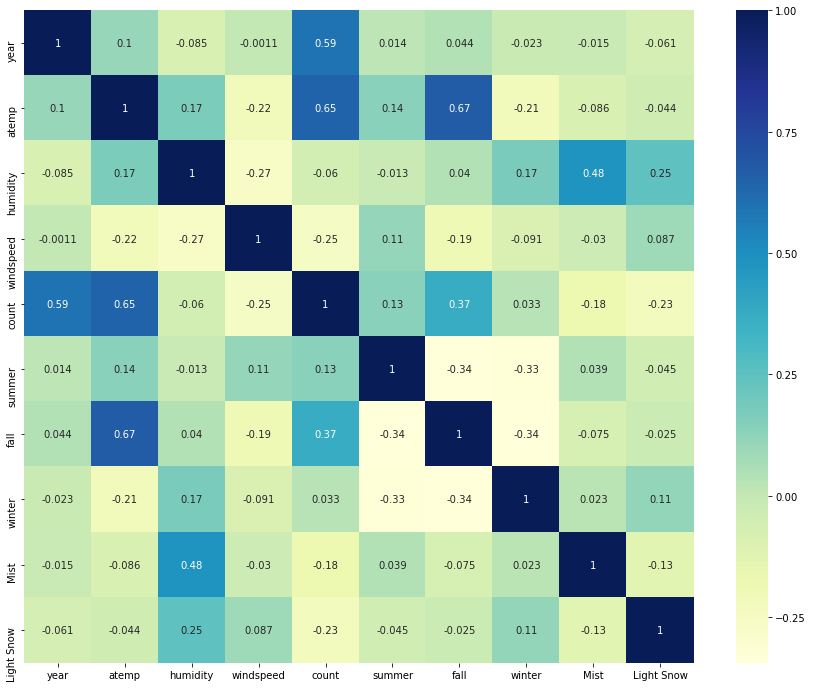

In [1016]:
# Checking correlation between these vars to check if they're correlated

plt.figure(figsize = (15,12))
sns.heatmap(df_train.corr(), annot =True,  cmap="YlGnBu")
plt.show()

In [1017]:
df_train.corr()

,year,atemp,humidity,windspeed,count,summer,fall,winter,Mist,Light Snow
year,1.000000,0.104206,-0.084792,-0.001108,0.591508,0.013856,0.044102,-0.022638,-0.015469,-0.060764
atemp,0.104206,1.000000,0.169461,-0.215283,0.646475,0.135806,0.669979,-0.211118,-0.086069,-0.044266
humidity,-0.084792,0.169461,1.000000,-0.266895,-0.059993,-0.013216,0.040371,0.171579,0.481042,0.245038
windspeed,-0.001108,-0.215283,-0.266895,1.000000,-0.253794,0.110089,-0.194690,-0.090649,-0.030385,0.086900
count,0.591508,0.646475,-0.059993,-0.253794,1.000000,0.134343,0.371606,0.032636,-0.175530,-0.226598
summer,0.013856,0.135806,-0.013216,0.110089,0.134343,1.000000,-0.340160,-0.328116,0.039442,-0.045231
fall,0.044102,0.669979,0.040371,-0.194690,0.371606,-0.340160,1.000000,-0.343764,-0.074887,-0.024817
winter,-0.022638,-0.211118,0.171579,-0.090649,0.032636,-0.328116,-0.343764,1.000000,0.023127,0.114448
Mist,-0.015469,-0.086069,0.481042,-0.030385,-0.175530,0.039442,-0.074887,0.023127,1.000000,-0.125817
Light Snow,-0.060764,-0.044266,0.245038,0.086900,-0.226598,-0.045231,-0.024817,0.114448,-0.125817,1.000000


 #### According to heatmap, there's better correlation b/w count and year, atemp


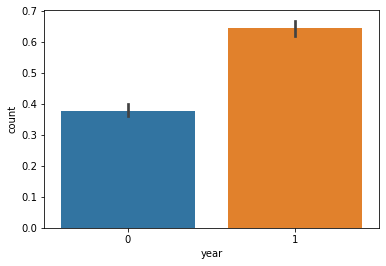

In [1018]:
sns.barplot(x = 'year', y ='count',data =df_train)
plt.show()

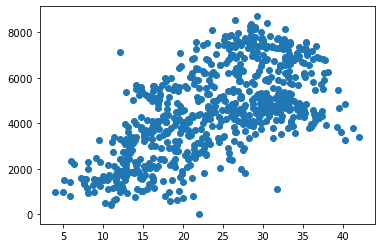

In [1019]:
plt.scatter(x = 'atemp', y = 'count', data =df)
plt.show()

##  Step 5 : Building our model using RFE

In [1020]:
# Splitting our train data in dependent and independent variables-

y_train = df_train.pop('count')
X_train = df_train

In [1021]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1022]:
X_train.head()

,year,month,holiday,weekday,workingday,atemp,humidity,windspeed,summer,fall,winter,Mist,Light Snow
653,1,10,0,2,1,0.501133,0.575354,0.300794,0,0,1,0,0
576,1,7,0,2,1,0.766351,0.725633,0.264686,0,1,0,0,0
426,1,3,0,6,0,0.438975,0.640189,0.255342,0,0,0,1,0
728,1,12,0,0,0,0.200348,0.498067,0.663106,0,0,0,0,0
482,1,4,0,6,0,0.391735,0.504508,0.188475,1,0,0,1,0


In [1023]:
# Running RFE with the output number of the variable equal to 14

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 14)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [1024]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('month', True, 1),
 ('holiday', True, 1),
 ('weekday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1),
 ('Mist', True, 1),
 ('Light Snow', True, 1)]

In [1025]:
col = X_train.columns[rfe.support_]
col

Index(['year', 'month', 'holiday', 'weekday', 'workingday', 'atemp',
       'humidity', 'windspeed', 'summer', 'fall', 'winter', 'Mist',
       'Light Snow'],
      dtype='object')

In [1026]:
X_train.columns[~rfe.support_]

Index([], dtype='object')

### Building model using statsmodel, for the detailed statistics

In [1027]:
# Creating X_test dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [1028]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [1029]:
lm = sm.OLS(y_train,X_train_rfe.astype(float)).fit()   # Running the linear model

In [1030]:
#Let's see the summary of our linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     186.8
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          1.54e-181
Time:                        20:18:13   Log-Likelihood:                 490.98
No. Observations:                 510   AIC:                            -954.0
Df Residuals:                     496   BIC:                            -894.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1660      0.030      5.502      0.0

###### Understanding:
- month, holiday and workingday have high significance
- Some variables have negative coefficients, which mean they affect our target variable negatively
    - holiday
    - humidity
    - windspeed
    - Mist 
    - Light Snow
    
  All these variables can be dropped from our model as they wont impact in our model's positive growth

In [1031]:
X_train_new = X_train_rfe.drop(['holiday','humidity','windspeed','Mist','Light Snow'], axis = 1)


Rebuiliding our model

In [1032]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [1033]:
lm = sm.OLS(y_train,X_train_lm.astype(float)).fit()   # Running the linear model

In [1034]:
#Let's see the summary of our linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     189.6
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          3.03e-146
Time:                        20:18:13   Log-Likelihood:                 393.80
No. Observations:                 510   AIC:                            -769.6
Df Residuals:                     501   BIC:                            -731.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0072      0.020     -0.352      0.7

##### Observation:
- weekday has p-value of 0.02 which can be ignored. All other variables are significant.
- R-squared = 0.746 and R-squared-adjusted = 0.743 which are relatively close and efficient.

In [1035]:

X_train_new = X_train_new.drop(['const'], axis=1)

In [1036]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,month,15.17
4,atemp,14.96
7,winter,6.72
6,fall,6.32
5,summer,3.34
3,workingday,2.76
2,weekday,2.75
0,year,1.99


In [1037]:
# Remove atemp

X_train_new = X_train_new.drop(['atemp'], axis=1)

In [1038]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,month,13.49
6,winter,6.69
5,fall,4.03
2,weekday,2.62
3,workingday,2.60
4,summer,2.12
0,year,1.86


In [1039]:
# Removing month 

X_train_new = X_train_new.drop(['month'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,2.49
1,weekday,2.36
0,year,1.83
4,fall,1.69
3,summer,1.61
5,winter,1.53


In [1040]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm.astype(float)).fit()   # Running the linear model

In [1041]:
y_train_price = lm.predict(X_train_lm)

In [1042]:
#Del after this

In [1043]:
# Removing some column -

X_train_new = X_train_new.drop(['workingday'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,weekday,2.15
0,year,1.76
3,fall,1.53
2,summer,1.45
4,winter,1.42


In [1044]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm.astype(float)).fit()   # Running the linear model

In [1045]:
y_train_price = lm.predict(X_train_lm)

In [1046]:
#Del before this

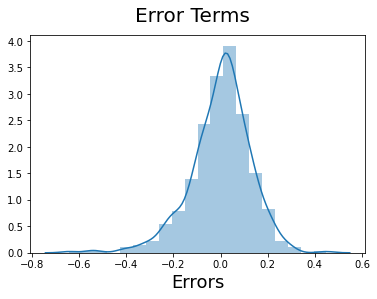

In [1047]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 
plt.show()

## Making predictions

In [1048]:
num_vars = ['atemp','humidity','windspeed','count']

df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [1049]:
y_test = df_test.pop('count')
X_test = df_test

In [1050]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     201.5
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          1.07e-117
Time:                        20:18:39   Log-Likelihood:                 318.55
No. Observations:                 510   AIC:                            -625.1
Df Residuals:                     504   BIC:                            -599.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1538      0.016      9.737      0.0

In [1051]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [1052]:
# Making predictions
y_pred = lm.predict(X_test_new)

### Model Evaluation

Text(0, 0.5, 'y_pred')

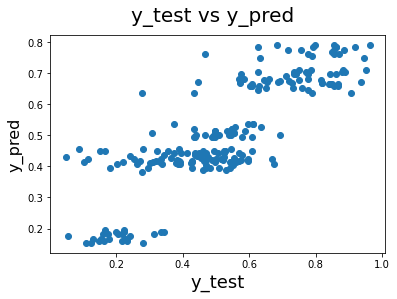

In [1053]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

#### As seen from the scatter plot, there's no proper distribution of the predictors

In [1054]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6890098295676329

Overall its a decent model, but we also acknowledge that we could do better. Perhaps we could have some more features(as mentioned below) which could add more insights in building the model.

We have a couple of options:
1. Rent charges on bikes- 
    - Weekdays
    - Weekends
    - Students
    - Adults
    - Months
    
2.  We could perhaps Build a non-linear model.

## Conclusion:
As seen from the train set and test set there are few independent variables that effects our Linear model. 
Weekday- People like to rent bikes to go to either offices to colleges. "summer, fall and winter"- People like to rent bikes in these season as it hasnt started raining or snowing. As year passes on, more people are attracted to rent bikes (as it may have become a trend). Hence, we should start some sound of Marketing or Discount rates to advertise more of our Bikes.